# Data Analysis for KZFP Shiny App
The goal of this script is to first recreate Anna's analysis of the Trono (https://doi.org/10.1038/nature21683) data. This will then be used to create an interactive Shiny app using R, which will be published for free on http://www.shinyapps.io/.

In [1]:
import pandas as pd

In [2]:
ls -lh

total 463M
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  26K Oct 17 21:04  41586_2017_BFnature21683_MOESM102_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 9.3M Oct 17 21:04  41586_2017_BFnature21683_MOESM103_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 359K Oct 17 21:04  41586_2017_BFnature21683_MOESM104_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 142K Oct 17 21:04  41586_2017_BFnature21683_MOESM105_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  33K Oct 17 21:04  41586_2017_BFnature21683_MOESM106_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 360K Oct 17 21:04  41586_2017_BFnature21683_MOESM107_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 416K Oct 17 21:04  41586_2017_BFnature21683_MOESM108_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 420K Oct 17 21:04  41586_2017_BFnature21683_MOESM109_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 325K Oct 17 21:04  41586_2017_BFnature21683_MOESM110_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 7.0M Oct 17 21:04  41586_2017_BF

In [3]:
df1 = pd.read_excel("41586_2017_BFnature21683_MOESM102_ESM.xlsx")

In [4]:
df1

,Species,Latin name,Common name,Class,Order,Estimated evolutionary distance from Homo Sapiens,# of KZFPs (protein coding + pseudogenes)
0,Oryzias_latipes.MEDAKA1,Oryzias latipes,Japanese rice fish,Actinopterygii,Beloniformes,429.6,0
1,Poecilia_formosa.PoeFor_5.1.2,Poecilia formosa,Amazon molly,Actinopterygii,Cyprinodontiformes,429.6,0
2,Xiphophorus_maculatus.Xipmac4.4.2,Xiphophorus maculatus,Southern platyfish,Actinopterygii,Cyprinodontiformes,429.6,0
3,Gadus_morhua.gadMor1,Gadus morhua,Atlantic cod,Actinopterygii,Gadiformes,429.6,0
4,Gasterosteus_aculeatus.BROADS1,Gasterosteus aculeatus,Three-spined stickleback,Actinopterygii,Gasterosteiformes,429.6,0
...,...,...,...,...,...,...,...
198,Pelodiscus_sinensis.PelSin_1.0,Pelodiscus sinensis,Chinese softshell turtle,Reptilia,Testudines,320.5,289
199,Chelonia_mydas.v1.0,Chelonia mydas,Green sea turtle,Reptilia,Testudines,320.5,292
200,Apalone_spinifera.ASM38561v1,Apalone spinifera,Spiny softshell turtle,Reptilia,Testudines,320.5,127
201,Chrysemys_picta_bellii.ChrPicBel3.0.1,Chrysemys picta bellii,Western painted turtle,Reptilia,Testudines,320.5,402


In [5]:
df1.loc[df1['Class']=='Aves']['# of KZFPs (protein coding + pseudogenes)'].mean()

np.float64(8.306451612903226)

In [6]:
# df2.loc[df2['Species']=='Cavia porcellus'] #['Cluster'] #.nunique() #['# of KZFPs (protein coding + pseudogenes)'].max()

### Note: 
df2, Supplementary Table 2 is the one I want to use. Anna used this to make the following plot.

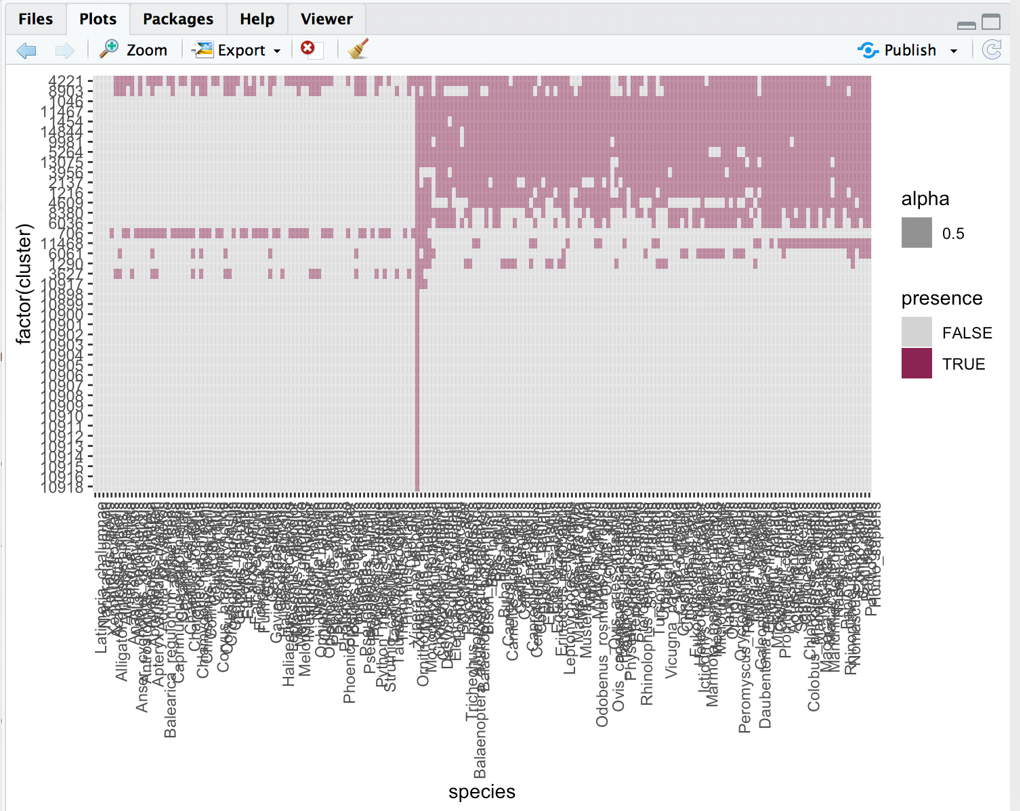

In [7]:
df2 = pd.read_excel("41586_2017_BFnature21683_MOESM103_ESM.xlsx")

In [9]:
# znf777_species_df2 = df2.loc[df2['Label']=='ZNF777'].sort_values(by='timeFromHuman_MY', ascending=False)
# znf777_species_df2

In [10]:
# df2.loc[df2['Cluster']==4221] #['Species'].nunique()

KeyError: 'Cluster'

In [11]:
df2.loc[df2['Gene ID']=='ENSG00000196453']

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species,Latin name,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster #
16142,ZNF777,protein_coding,ENSG00000196453,7,149431787,149432630,-,DUF3669-KRAB-ZNFs,LNI-HQL-HSK-LSI-RHR-EKN-RHE-QHE-YSY,9,9,CMECGKSFRLKINLIIHQRNH-CAECEISFRHKQQLTLHQRIH-CP...,Homo_sapiens.GRCh38,Homo sapiens,Human,Mammalia,Primate,0.0,4221


In [12]:
genes = df2['Gene ID'].unique()
len(genes)

22728

In [13]:
num_duplicates_name = df2['Gene ID'].duplicated().sum()
num_duplicates_name + len(genes)

np.int64(48404)

In [14]:
for gene in genes:
    if "" in gene:
        print(gene)

rna8983
.
ENSCAFG00000032314
gene26040
rna12279
rna30376
rna19156
gene9717
rna5776
ENSAMEG00000012002
ENSCAFG00000032585
rna2758
rna14859
ENSMPUG00000014515
rna9327
gene6335
rna28025
ENSG00000186300
rna26941
ENSPTRG00000010246
ENSGGOG00000001761
ENSPPYG00000009360
rna32080
rna18407
ENSCSAG00000011462
rna35780
141222000334853_12_1
rna27983
rna1237
rna30722
rna12018
rna39095
rna18260
rna16399
ENSOGAG00000000383
rna11768
gene19067
rna27967
gene28203
rna37400
rna43559
PREHGLG00000008607
rna10945
ENSAMEG00000005361
rna6262
rna36069
rna1854
ENSBTAG00000008397
rna9622
rna25067
rna29900
rna9772
ENSCAFG00000031385
rna14344
ENSECAG00000020559
rna31561
rna19801
rna16730
ENSMPUG00000006605
rna3239
rna1640
rna5054
rna17939
ENSOARG00000013428
rna2930
rna569
ENSP00000334853_11_1
rna324
rna21182
rna15736
ENSSSCG00000013469
XM_004312790.1_11
rna34351
rna15455
ENSDNOG00000032977
gene3641
rna34356
ENSAMEG00000009909
rna11591
ENSG00000167981
rna19567
ENSPTRG00000007699
ENSGGOG00000007436
rna33593
rna42881

In [15]:
df3 = pd.read_excel("41586_2017_BFnature21683_MOESM104_ESM.xlsx")

In [16]:
df3

,Unnamed: 0,Human,Common chimpanzee,Bonobo,Western gorilla,Sumatran orangutan,Northern white-cheeked gibbon,Rhesus macaque,Crab-eating macaque,Southern pig-tailed macaque,...,American alligator,Chinese alligator,Spiny softshell turtle,Chinese softshell turtle,Western painted turtle,Green sea turtle,African clawed frog,Western clawed frog,High Himalaya frog,West Indian Ocean coelacanth
0,Human,1.000000,0.924396,0.890218,0.822486,0.840860,0.865129,0.825924,0.819692,0.839040,...,0.011112,0.012898,0.005249,0.006178,0.010157,0.012301,0.000000,0.000000,0.000000,0
1,Common chimpanzee,0.924396,1.000000,0.894838,0.819388,0.850095,0.872119,0.830390,0.824139,0.848516,...,0.011130,0.012922,0.005255,0.006190,0.010181,0.012325,0.000000,0.000000,0.000000,0
2,Bonobo,0.890218,0.894838,1.000000,0.789490,0.821249,0.832347,0.811558,0.803037,0.822206,...,0.011232,0.013057,0.005289,0.006258,0.012895,0.012460,0.000000,0.000000,0.000000,0
3,Western gorilla,0.822486,0.819388,0.789490,1.000000,0.757290,0.778811,0.761385,0.755825,0.769357,...,0.011359,0.013227,0.005331,0.006343,0.007864,0.009472,0.000000,0.000000,0.000000,0
4,Sumatran orangutan,0.840860,0.850095,0.821249,0.757290,1.000000,0.811423,0.787532,0.776652,0.795488,...,0.010919,0.012640,0.005184,0.006049,0.009899,0.012043,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Green sea turtle,0.012301,0.012325,0.012460,0.009472,0.012043,0.009217,0.012460,0.012385,0.012498,...,0.126043,0.119870,0.088365,0.171644,0.404049,1.000000,0.000000,0.000000,0.000000,0
184,African clawed frog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.373392,0.081232,0
185,Western clawed frog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.373392,1.000000,0.034612,0
186,High Himalaya frog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003339,0.002860,0.000000,0.002724,0.000000,0.000000,0.081232,0.034612,1.000000,0


In [17]:
df4 = pd.read_excel("41586_2017_BFnature21683_MOESM105_ESM.xlsx")

In [18]:
df4

,Gene symbol,Ensembl ID,KRAB domain configuration,DNA binding homolog found at the latest,cloned ORF sequence
0,ZNF681,ENSG00000196172,KRAB-ZNF,Old World monkeys,ATGGAACCCCTGAAGTTCCGGGACGTGGCCATCGAGTTCAGCCTGG...
1,ZNF682,ENSG00000197124,KRAB-ZNF,New world monkeys,ATGGAACTGCTGACCTTCCGGGACGTGACCATCGAGTTCAGCCTGG...
2,ZNF684,ENSG00000117010,KRAB-ZNF,Eutherians,ATGATCAGCTTCCAGGAATCAGTGACATTCCAGGATGTGGCTGTGG...
3,ZNF695,ENSG00000197472,KRAB-ZNF,Old World monkeys,ATGGGACTGCTGGCCTTCCGGGATGTGGCCCTGGAATTCAGCCCCG...
4,ZNF69,ENSG00000198429,KRAB-ZNF,Old World monkeys,ATGCCCTGCTGCAGCCACCGGCGGTGCAGAGAGGATCCTGGCACCA...
...,...,...,...,...,...
217,ZNF33B,ENSG00000196693,KRAB-ZNF,Eutherians,ATGAACAAGGTGGACCAGAAATTCCAGGGCAGCGTGTCCTTCAAGG...
218,ZNF343,ENSG00000088876,KRAB-ZNF,Eutherians,ATGATGCTGCCCTACCCCAGCGCCCTGGGCGATCAGTACTGGGAGG...
219,ZNF354A,ENSG00000169131,KRAB-ZNF,Eutherians,ATGGCCGCTGGCCAGAGAGAAGCCAGACCCCAGGTGTCCCTGACCT...
220,ZNF354B,ENSG00000178338,KRAB-ZNF,Eutherians,ATGGCCGCTGGCCAGAGAGAAGCCAGACCCCAGGTGTCCCTGACCT...


In [19]:
df4.loc[df4['Ensembl ID']=='ENSG00000196453']

,Gene symbol,Ensembl ID,KRAB domain configuration,DNA binding homolog found at the latest,cloned ORF sequence
21,ZNF777,ENSG00000196453,DUF3669-KRAB-ZNF,Sauropsids,ATGGAAAACCAGCGGAGCAGCCCCCTGAGCTTCCCCAGCGTGCCCC...


In [20]:
znfs = df4['Ensembl ID'].tolist()

for gene in genes:
    if gene in znfs:
        print(f"MATCH: {gene} from df2 and {znfs[znfs.index(gene)]} from df4")

MATCH: ENSG00000186300 from df2 and ENSG00000186300 from df4
MATCH: ENSG00000124459 from df2 and ENSG00000124459 from df4
MATCH: ENSG00000152443 from df2 and ENSG00000152443 from df4
MATCH: ENSG00000196357 from df2 and ENSG00000196357 from df4
MATCH: ENSG00000204644 from df2 and ENSG00000204644 from df4
MATCH: ENSG00000169951 from df2 and ENSG00000169951 from df4
MATCH: ENSG00000172888 from df2 and ENSG00000172888 from df4
MATCH: ENSG00000096654 from df2 and ENSG00000096654 from df4
MATCH: ENSG00000198040 from df2 and ENSG00000198040 from df4
MATCH: ENSG00000187801 from df2 and ENSG00000187801 from df4
MATCH: ENSG00000187815 from df2 and ENSG00000187815 from df4
MATCH: ENSG00000177842 from df2 and ENSG00000177842 from df4
MATCH: ENSG00000169131 from df2 and ENSG00000169131 from df4
MATCH: ENSG00000178338 from df2 and ENSG00000178338 from df4
MATCH: ENSG00000083814 from df2 and ENSG00000083814 from df4
MATCH: ENSG00000189042 from df2 and ENSG00000189042 from df4
MATCH: ENSG00000155592 f

In [21]:
znfIDs = df4['Gene symbol'].tolist()

In [22]:
znfs[znfIDs.index("ZNF777")]

'ENSG00000196453'

In [23]:
df5 = pd.read_excel("41586_2017_BFnature21683_MOESM106_ESM.xlsx")

/home/danie_ubuntu/miniconda3/lib/python3.13/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [24]:
df5

,Unnamed: 0,ZNF776,ZNF566,ZNF264,ZNF682,ZNF266,ZNF891,ZNF552,ZNF527,ZNF383,...,ZNF334,ZNF79,ZNF627,ZNF324B,ZNF285,ZNF555,ZNF611,ZNF641,ZNF274,ZNF75D
0,TSS 2.5kb,45.790554,45.539906,43.846154,33.915771,32.981928,45.064378,37.837838,49.019608,43.812233,...,17.977528,20.000000,3.477444,5.128205,5.487805,11.089109,19.237102,22.132797,8.893709,8.946939
1,Simple repeats,10.882957,6.338028,13.846154,4.928315,7.153614,7.725322,5.405405,9.150327,18.492176,...,8.426966,1.428571,0.563910,0.000000,4.268293,23.762376,4.445664,8.249497,3.904555,3.167347
2,Transposable elements,38.398357,40.375587,45.000000,40.143369,37.349398,30.042918,27.027027,32.026144,31.152205,...,48.314607,45.714286,94.078947,76.923077,69.512195,29.900990,70.307355,60.965795,38.828633,40.163265
3,LINE,1.232033,0.469484,1.538462,4.973118,5.421687,5.579399,5.405405,4.575163,3.413940,...,4.494382,15.714286,2.349624,5.128205,9.146341,3.168317,1.372119,0.603622,19.088937,16.163265
4,ERV,34.907598,37.323944,39.615385,31.451613,24.397590,18.025751,16.216216,18.954248,22.759602,...,10.112360,1.428571,1.879699,0.000000,1.829268,1.782178,8.452250,5.835010,8.459870,15.314286
5,SINE,3.285421,2.582160,5.384615,4.793907,6.475904,6.437768,5.405405,10.457516,4.836415,...,18.539326,14.285714,3.101504,10.256410,21.951220,4.752475,2.305159,0.804829,15.401302,5.942857
6,DNA transposons,0.821355,1.173709,0.769231,1.568100,2.936747,1.716738,2.702703,3.267974,0.426743,...,2.808989,22.857143,87.875940,64.102564,45.731707,21.980198,0.466520,0.000000,2.386117,4.016327
7,SVA,0.000000,0.000000,0.000000,0.000000,0.000000,0.858369,0.000000,0.000000,0.284495,...,14.606742,0.000000,0.000000,0.000000,0.000000,0.000000,58.150384,53.722334,0.000000,0.048980
8,Zinc finger genes,0.616016,0.000000,0.000000,0.179211,0.451807,0.429185,0.000000,0.000000,0.284495,...,0.000000,0.000000,0.187970,0.000000,0.000000,0.198020,0.164654,0.000000,32.537961,6.432653


In [25]:
df6 = pd.read_excel("41586_2017_BFnature21683_MOESM107_ESM.xlsx")

In [26]:
df6

,Unnamed: 0,DNA/hAT-Charlie/Charlie8,DNA/hAT-Charlie/MER102c,DNA/hAT-Blackjack/MER63A,DNA/hAT-Blackjack/MER63B,LTR/ERVL/MLT2A1,LTR/ERVL/MLT2A2,LTR/ERVK/LTR22A,LTR/ERVL-MaLR/MLT1F2,LTR/ERVL-MaLR/MLT1E1A,...,LTR/ERVL/ERVL-E-int,LTR/ERVL/HERVL-int,DNA/hAT-Charlie/MER20,LTR/ERVL-MaLR/MLT1B,DNA/hAT-Charlie/Charlie1a,DNA/hAT-Tip100/MamTip2,LTR/ERV1/LTR48,LTR/ERV1/MER34C2,LTR/ERV1/PABL_A,DNA/TcMar-Tigger/Tigger17a
0,ZNF157,0.379285,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,98.142881,288.334449,0.071171,17.521041,0.203188,0.397319,0.0,0.000000,0.0,0.000000
1,ZNF302,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.896856,319.942228,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,ZNF485,0.127736,0.000000,0.000000,0.222225,0.0,0.000000,0.0,0.037056,0.009576,...,24.448886,319.942228,154.663741,0.044248,0.002947,0.054449,0.0,0.334332,0.0,0.021005
3,ZNF671,0.045088,0.000000,0.086207,0.000000,0.0,0.512047,0.0,0.244198,0.000000,...,0.003698,57.739511,0.000121,0.000839,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,ZNF614,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.631041,0.000000,0.553023,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,ZNF418,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
155,ZNF74,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
156,ZNF285,0.000000,0.000000,105.004077,70.753975,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
157,ZNF180,99.439017,134.784534,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [27]:
df7 = pd.read_excel("41586_2017_BFnature21683_MOESM108_ESM.xlsx")

In [28]:
df7

,Unnamed: 0,ZNF880,ZNF442,ZNF214,ZNF785,ZNF737,ZNF620,ZNF582,ZNF205,ZNF496,...,ZNF441,ZNF479,ZNF783,ZNF695,ZNF257,ZNF273,ZNF534,ZNF263,ZNF519,ZNF202
0,ZIM3,5.165755,4.795623,4.658835,3.548439,3.805922,4.522047,3.894432,5.028967,3.910525,...,7.627937,7.483103,7.201481,9.510782,7.901513,7.700354,7.941744,7.281944,8.239459,7.893466
1,ZNF133,4.769552,4.689256,5.154970,3.259997,3.372410,4.608961,3.918420,4.480488,3.099406,...,8.334672,8.993095,8.463144,10.133291,9.410631,9.153686,9.571222,9.442749,10.582945,10.550827
2,ZNF485,5.040164,4.047882,4.504646,3.795873,3.134352,4.473145,3.496614,3.795873,2.740589,...,7.119231,8.111514,7.245235,8.316270,9.182548,8.284769,9.056544,8.836037,9.151047,9.497559
3,ZNF808,4.779788,3.721407,4.062820,3.175145,3.243428,3.994537,3.175145,3.618983,2.833732,...,7.476955,7.067258,6.555138,8.842608,7.818368,8.091499,9.320587,7.101400,8.535336,8.159781
4,ZNF17,4.858300,5.465587,4.706478,3.087045,3.744939,5.465587,3.846154,4.200405,4.048583,...,7.692308,11.234818,7.844130,9.008097,8.906883,10.070850,8.704453,8.147773,8.704453,8.906883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,ZIM2,7.792208,11.688312,5.194805,6.493506,2.597403,3.896104,12.987013,3.896104,1.298701,...,35.064935,42.857143,32.467532,32.467532,45.454545,41.558442,51.948052,40.259740,53.246753,71.428571
218,ZNF114,5.633803,11.267606,7.042254,4.225352,5.633803,5.633803,7.042254,1.408451,1.408451,...,28.169014,30.985915,25.352113,43.661972,39.436620,33.802817,53.521127,49.295775,46.478873,73.239437
219,ZKSCAN2,7.674944,5.793830,4.966140,2.934537,3.160271,7.373965,2.859293,3.235515,3.686983,...,50.564334,40.481565,31.602709,67.343868,51.768247,50.714823,56.057186,61.550038,61.926260,69.601204
220,ZNF311,3.448276,4.137931,4.827586,0.689655,3.448276,8.275862,6.206897,2.068966,4.137931,...,37.241379,40.689655,31.034483,35.172414,57.931034,68.965517,64.827586,55.862069,61.379310,64.827586


In [29]:
df8 = pd.read_excel("41586_2017_BFnature21683_MOESM109_ESM.xlsx")

In [30]:
df8

,Unnamed: 0,CTCF_fibroblast of pulmonary artery_ENCFF002DDD,CTCF_choroid plexus epithelial cell_ENCFF002DCS,CTCF_brain microvascular endothelial cell_ENCFF002DCP,CTCF_fibroblast of villous mesenchyme_ENCFF002DDI,CTCF_A549_ENCFF002DBU,CTCF_fibroblast of mammary gland_ENCFF002DDC,CTCF_keratinocyte_ENCFF002DDN,CTCF_mammary epithelial cell_ENCFF002DDB,CTCF_epithelial cell of proximal tubule_ENCFF002DDP,...,SRF_H1-hESC_ENCFF002CJN,CHD1_H1-hESC_ENCFF002CDR,ZNF263_K562_ENCFF002CYS,CEBPZ_GM12878_ENCFF992ABC,CEBPZ_K562_ENCFF680ONH,EP300_K562_ENCFF002CEQ,RXRA_H1-hESC_ENCFF002CJH,POU5F1_H1-hESC_ENCFF002CJF,ZNF274_NT2/D1_ENCFF002CZT,ZNF274_GM08714_ENCFF002COH
0,ZNF223,50.590067,52.301899,50.374688,51.016825,58.125518,55.995679,57.256490,53.596879,54.263603,...,0.000000,0.000000,2.503804,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,ZNF225,44.058489,47.261219,45.924453,47.368556,44.116907,44.230623,43.832683,46.617983,48.505845,...,1.304511,0.000000,0.000000,0.000000,0.000000,0.000000,2.191314,0.000000,0.0,0.0
2,ZNF124,44.716699,43.595166,42.966576,50.903090,45.946922,41.892790,40.245652,37.709965,43.931814,...,0.813032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,ZNF479,53.892790,53.070581,63.844664,53.380907,55.174574,54.714443,53.524329,53.603801,52.823909,...,1.117257,0.351921,4.295849,0.696851,9.838632,2.522297,0.506299,1.701374,0.0,0.0
4,ZNF534,61.488117,61.459671,66.853872,64.381952,67.293282,54.725842,59.872895,58.478862,56.533132,...,4.696804,21.555955,3.358144,1.760493,2.936938,3.456545,0.544789,3.051385,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,ZNF2,321.643458,321.643458,321.643458,321.643458,321.643458,321.643458,321.643458,321.643458,321.643458,...,0.526037,1.179963,0.000000,1.581778,1.236958,0.000000,4.841638,0.557490,0.0,0.0
104,ZNF443,181.434152,181.754487,180.970616,194.525784,196.928118,182.083020,158.671620,171.593460,170.667562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
105,ZNF621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
106,ZNF69,0.677736,0.000000,0.000000,0.784886,0.747725,0.000000,0.000000,0.000000,0.625859,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [31]:
df9 = pd.read_excel("41586_2017_BFnature21683_MOESM110_ESM.xlsx")

/home/danie_ubuntu/miniconda3/lib/python3.13/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [32]:
df9

,Unnamed: 0,Brain Hippocampus Middle,Brain Substantia Nigra,Brain Inferior Temporal Lobe,Brain Cingulate Gyrus,Brain Anterior Caudate,Brain_Dorsolateral_Prefrontal_Cortex,Fetal Lung,Fetal Brain Female,Fetal Muscle Trunk,...,Primary T cells from cord blood,NHDF-Ad Adult Dermal Fibroblast Primary Cells,Fetal Kidney,NHLF Lung Fibroblast Primary Cells,iPS DF 6.9 Cells,Foreskin Fibroblast Primary Cells skin02,Placenta Amnion,Fetal Brain Male,Fetal Heart,HUVEC Umbilical Vein Endothelial Primary Cells
0,ZNF765,2.673611e+02,246.541108,2.579543e+02,1.640686e+02,2.278666e+02,236.151588,1.256975e+02,3.233062e+02,3.233062e+02,...,1.141306e+00,1.907968,5.713058e-01,1.803637,146.640668,8.392033e+01,2.817985e+01,21.960575,1.375822e-01,2.403255e-03
1,ZNF649,2.436442e+02,210.508080,2.093812e+02,1.084417e+02,2.178062e+02,193.895298,1.199831e+02,3.233062e+02,3.233062e+02,...,5.172431e-01,0.013019,1.439863e+00,0.000983,234.245549,2.774944e+01,1.834788e+01,7.385243,2.077948e-06,0.000000e+00
2,ZNF506,1.996060e+02,198.627086,2.334703e+02,1.968856e+02,1.621871e+02,224.903895,1.395593e+02,2.522907e+02,2.631975e+02,...,3.241668e+00,21.867774,2.365972e+00,8.182402,86.576082,9.582467e+01,3.458033e+01,42.026705,6.727490e+00,2.513373e+00
3,ZNF680,3.233062e+02,323.306215,3.233062e+02,3.233062e+02,2.920614e+02,323.306215,1.980488e+02,3.233062e+02,2.039351e+02,...,9.710192e+00,26.083136,2.174466e+01,13.945063,57.707516,4.493732e+01,1.280528e+01,323.306215,1.136055e+02,2.063793e+00
4,ZNF793,3.233062e+02,323.306215,3.233062e+02,3.233062e+02,3.233062e+02,323.306215,2.521836e+02,3.233062e+02,3.233062e+02,...,3.341805e+01,42.256729,2.359041e+01,14.737805,127.768903,1.346147e+02,5.822483e+01,137.626605,3.446253e+01,1.316182e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,ZNF460,0.000000e+00,0.000000,6.236035e-09,0.000000e+00,2.994895e-09,0.000000,4.788097e-09,2.062465e-09,5.505985e-09,...,0.000000e+00,0.000000,8.783719e-07,0.000000,0.000000,3.974229e-09,1.828380e-09,8.380118,5.474107e-03,0.000000e+00
173,ZNF284,8.004048e-10,0.000000,5.334873e-09,1.655096e-09,2.386014e-09,0.000000,2.805542e-09,2.143678e-09,5.983709e-09,...,1.089571e-07,0.002318,7.663550e-04,0.000003,0.000000,9.914943e-09,0.000000e+00,1.180687,7.134756e-07,0.000000e+00
174,ZNF716,1.345686e-04,0.002184,2.670856e-02,3.068836e-02,2.003231e-06,0.006557,1.406556e-01,2.282107e-02,2.728130e-01,...,1.338115e-01,2.415916,1.409457e+00,0.765766,0.054635,7.034268e-09,7.403540e-04,28.290394,1.389508e+01,2.242372e-07
175,ZNF613,3.555562e-05,0.016831,1.613114e-02,7.522959e-02,4.448935e-02,0.014610,2.759694e-02,5.399809e-02,1.538134e-01,...,2.655289e-01,0.103823,7.933096e-01,0.074242,0.019399,0.000000e+00,5.777070e-04,23.812888,1.589530e+01,0.000000e+00


In [33]:
df10 = pd.read_excel("41586_2017_BFnature21683_MOESM111_ESM.xlsx")

In [34]:
df10

,entrezgene_id,Ensembl Gene ID,Gene symbol,"tpm.mesenchymal stem cells (adipose derived), adipogenic induction, 00hr30min, biol_rep3.CNhs13427.13237-142A6","tpm.Hepatic Sinusoidal Endothelial Cells, donor3.CNhs12625.11682-122H8","tpm.mesenchymal stem cells (adipose derived), adipogenic induction, 01hr20min, biol_rep3.CNhs13599.13246-142B6",tpm.leiomyosarcoma cell line:Hs 5.T.CNhs12192.10722-110A2,"tpm.Monocyte-derived macrophages response to mock influenza infection, 00hr00min, donor1 (868_121:MI_0h).CNhs13637.13304-142I1","tpm.mesenchymal stem cells (adipose derived), adipogenic induction, 01hr20min, biol_rep2.CNhs13598.13245-142B5","tpm.Cardiac Myocyte, donor1.CNhs12341.11525-119I4",...,"tpm.CD14+ monocytes - treated with Cryptococcus, donor2.CNhs13487.11877-125C5","tpm.CD14+ monocytes - treated with B-glucan, donor2.CNhs13489.11879-125C7","tpm.CD14+ monocytes - treated with Trehalose dimycolate (TDM), donor3.CNhs13544.11882-125D1","tpm.CD14+ monocytes - treated with Trehalose dimycolate (TDM), donor2.CNhs13483.11872-125B9","tpm.CD14+ monocytes - treated with BCG, donor2.CNhs13475.11870-125B7","tpm.CD14+ monocytes - treated with Trehalose dimycolate (TDM), donor1.CNhs13467.11862-125A8","tpm.CD14+ monocytes - treated with BCG, donor1.CNhs13465.11860-125A6","tpm.CD14+ monocytes - treated with IFN + N-hexane, donor1.CNhs13466.11861-125A7","tpm.CD14+ monocytes - treated with IFN + N-hexane, donor3.CNhs13490.11881-125C9","tpm.CD14+ monocytes - treated with IFN + N-hexane, donor2.CNhs13476.11871-125B8"
0,entrezgene:10308,ENSG00000185947,ZNF267,0.0,19.665846,21.535213,10.469384,76.386288,3.710114,2.438069,...,442.107963,553.431977,1486.874831,982.995301,894.000866,875.601598,904.792574,454.205240,606.517820,620.930366
1,entrezgene:440077,ENSG00000196946,ZNF705A,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.545812,0.822336,4.126588,2.607415,1.536964,1.256243,2.589232,0.659703,0.852450,0.598391
2,entrezgene:7752,ENSG00000010539,ZNF200,0.0,3.277641,7.178404,0.000000,5.875868,3.710114,0.000000,...,11.462058,14.802044,79.056739,81.351335,77.104373,95.976990,77.964638,71.907583,70.327084,72.604771
3,entrezgene:79027,ENSG00000197343,ZNF655,0.0,3.277641,21.535213,31.408152,35.255210,22.260684,26.818755,...,88.967405,94.979782,93.391203,91.259511,105.025890,107.785677,118.816958,94.667323,111.244660,102.324856
4,entrezgene:100287226,ENSG00000196350,ZNF729,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,entrezgene:65988,ENSG00000169955,ZNF747,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.411168,0.000000,0.521483,0.000000,0.251249,0.000000,0.000000,0.000000,0.398927
333,entrezgene:27153,ENSG00000196453,ZNF777,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334,entrezgene:155054,ENSG00000204947,ZNF425,0.0,0.000000,0.000000,0.000000,0.000000,3.710114,2.438069,...,0.545812,0.000000,0.000000,0.521483,0.512321,0.251249,0.863077,0.659703,0.000000,0.199464
335,entrezgene:340385,ENSG00000197363,ZNF517,0.0,0.000000,0.000000,10.469384,0.000000,11.130342,4.876137,...,0.545812,0.000000,0.000000,0.521483,0.000000,0.251249,0.000000,0.000000,0.000000,0.000000


In [35]:
df2.head()

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species,Latin name,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster #
0,LOC103802812,mRNA,rna8983,NW_008674413.1,3230,3739,-,KRAB-ZNFs,LNI-(XXX)-CSQ-RHR,4,3,CTECGKRFRLKINLIIHQRSH-(PVCDSVFSNKQHLDLHQSIH)-C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,204
1,NaN,.,.,GL192628.1,1267130,1268190,+,(KRAB)-ZNFs,(VAR)-(XXX)-(QNR)-(NVR)-(EYR)-(DTK)-(XXX)-(XXX),8,5,(CGECGQGFKVKSAVIRHHRTH)-(CGECGRGFSQMXNLINHRRH)...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,205
2,NaN,.,.,AGTM011622723.1,2406,3518,+,ZNFs,(CDQ)-(WSL)-(XXX)-(QHL)-(QQV)-(XXX)-(QQL)-(HSQ...,12,8,(CDKCGKYFSCSSDLAQHQSSH)-(CNVCGKXFSWDSSLILHHRTH...,Daubentonia_madagascariensis.v1.0,Daubentonia madagascariensis,Aye-aye,Mammalia,Primate,75.9,206
3,NaN,.,.,NW_007727638.1,337222,338335,-,(KRAB)-ZNFs,(CAR)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDRCGKYFSCGLALTRHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Galeopterus_variegatus.v3.0.2,Galeopterus variegatus,Sunda flying lemur,Mammalia,Dermoptera,81.3,206
4,NaN,.,.,GL192766.1,251367,252480,-,(KRAB)-ZNFs,(CDQ)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDQCGKYFSCGLDLTQHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,206


## Target question: How conserved are KRAB-ZFPs across species?

Check for all 15099 clusters (last column, 19) if there is an entry (TRUE/FALSE) in each of 191 species (column 14). Using Latin name as species name, Estimated evolutionary distance from human (MY) as species age, and Cluster # as cluster.

In [36]:
df2['Cluster #'].nunique()

15099

In [37]:
df2['Cluster #'].unique()

array([  204,   205,   206, ..., 15300, 15301, 15302], shape=(15099,))

In [38]:
df2['Latin name'].nunique()

191

Target output format for this step:
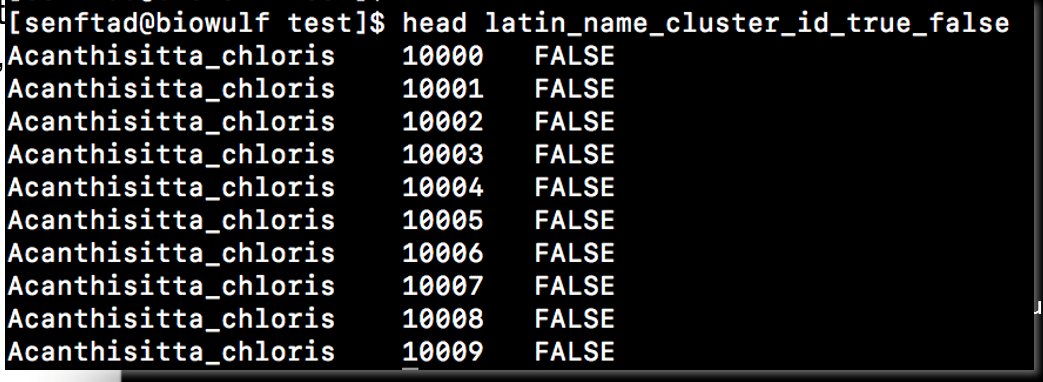

In [39]:
df2.loc[df2['Cluster #'] == 206]

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species,Latin name,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster #
2,NaN,.,.,AGTM011622723.1,2406,3518,+,ZNFs,(CDQ)-(WSL)-(XXX)-(QHL)-(QQV)-(XXX)-(QQL)-(HSQ...,12,8,(CDKCGKYFSCSSDLAQHQSSH)-(CNVCGKXFSWDSSLILHHRTH...,Daubentonia_madagascariensis.v1.0,Daubentonia madagascariensis,Aye-aye,Mammalia,Primate,75.9,206
3,NaN,.,.,NW_007727638.1,337222,338335,-,(KRAB)-ZNFs,(CAR)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDRCGKYFSCGLALTRHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Galeopterus_variegatus.v3.0.2,Galeopterus variegatus,Sunda flying lemur,Mammalia,Dermoptera,81.3,206
4,NaN,.,.,GL192766.1,251367,252480,-,(KRAB)-ZNFs,(CDQ)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDQCGKYFSCGLDLTQHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,206
5,NaN,protein_coding,ENSCAFG00000032314,26,30193248,30194361,+,KRAB-ZNFs,CDQ-RHQ-WSL-QCQ-QHL-QQL-HSQ-QQL-HSQ-WHQ-RHQ-QY...,13,13,CDQCGKDFSCGLDLTQHQSTH-CRNCDKSFSRGTHLIQHERCH-CN...,Canis_familiaris.CanFam3.1,Canis familiaris,Dog,Mammalia,Carnivora,97.5,206
6,LOC103543601,exon,gene26040,NW_007680460.1,33356,34469,-,ZNFs,CDQ-RHQ-WSL-QCQ-QHL-QQL-HSQ-QQL-HSQ-WHQ-RHQ-QH...,13,12,CAKCGKCFSCGLDVTQHQSTH-CKNCGKSFSRGTHLIQHERCH-CN...,Equus_przewalskii.v1.0,Equus przewalskii,Przewalski's horse,Mammalia,Perissodactyla,97.5,206
7,NaN,.,.,NC_018734.2,28690527,28691620,+,(KRAB)-ZNFs,(XXX)-(RHQ)-(XSL)-(QCQ)-(QHL)-(QQL)-(XXX)-(QQL...,13,10,(DQCGKYISCGLDLAQHQGSH)-(CRDCDKSFSRGTHLIQHERCH)...,Felis_catus.v8.0,Felis catus,Cat,Mammalia,Carnivora,97.5,206
8,LOC102745885,mRNA,rna12279,NW_006383977.1,257887,259000,-,KRAB-ZNFs,CDQ-RHQ-WSL-QCQ-QHL-QQL-HSQ-QQL-HSQ-WHQ-RHQ-QY...,13,13,CDQCGKYFGCGLDLTQHQSTH-CRNCGKSFSRGTHLIQHERCH-CT...,Leptonychotes_weddellii.v1.0,Leptonychotes weddellii,Weddell seal,Mammalia,Carnivora,97.5,206
9,LOC101380464,mRNA,rna30376,NW_004451266.1,269816,270929,-,KRAB-ZNFs,CDQ-RHQ-WSL-QCQ-QHL-QQL-HSQ-QQL-HSQ-WHQ-RHQ-HY...,13,13,CDQCGKYFGCGLDLTQHQSTH-CRNCGKSFSRGTHLIQHERCH-CN...,Odobenus_rosmarus_divergens.v1.0,Odobenus rosmarus divergens,Walrus,Mammalia,Carnivora,97.5,206
10,NaN,.,.,NW_006712064.1,709657,710666,+,(KRAB)-ZNFs,(XXX)-(RHQ)-(WSL)-(QHQ)-(QHL)-(QQL)-(XXX)-(QQL...,12,9,(DQCGKYISCGLDLAQHQGSH)-(CRSCDKSFSRGTHLIQHERCH)...,Panthera_tigris_altaica.v1.0,Panthera tigris altaica,Siberian Tiger,Mammalia,Carnivora,97.5,206
11,NaN,.,.,NW_006433949.1,6657257,6658368,+,(KRAB)-ZNFs,(CDQ)-(RHQ)-(WSL)-(QCQ)-(QHP)-(QQL)-(HSQ)-(QQL...,13,11,(CDKCGKYFSCGLDLTQHQSFH)-(CKNCGKSFSRGTHLIQHERCH...,Pteropus_alecto.ASM32557v1,Pteropus alecto,Black flying fox,Mammalia,Chiroptera,97.5,206


In [40]:
rows = []

# Get rows for each species, cluster, and presence/absence boolean value

In [41]:
species = df2['Latin name'].unique()
species

array(['Acanthisitta chloris', 'Ailuropoda melanoleuca',
       'Daubentonia madagascariensis', 'Galeopterus variegatus',
       'Canis familiaris', 'Equus przewalskii', 'Felis catus',
       'Leptonychotes weddellii', 'Odobenus rosmarus divergens',
       'Panthera tigris altaica', 'Pteropus alecto', 'Ursus maritimus',
       'Dasypus novemcinctus', 'Mustela putorius furo', 'Homo sapiens',
       'Pan paniscus', 'Pan troglodytes', 'Gorilla gorilla',
       'Pongo abelii', 'Nomascus leucogenys', 'Cercocebus atys',
       'Chlorocebus sabaeus', 'Colobus angolensis palliatus',
       'Macaca fascicularis', 'Macaca mulatta', 'Macaca mulatta lasiota',
       'Macaca nemestrina', 'Mandrillus leucophaeus', 'Nasalis larvatus',
       'Papio hamadryas', 'Rhinopithecus roxellana', 'Aotus nancymaae',
       'Saimiri boliviensis', 'Tarsius syrichta', 'Eulemur flavifrons',
       'Eulemur macaco', 'Microcebus murinus', 'Otolemur garnettii',
       'Propithecus coquereli', 'Tupaia chinensis', 'Chin

In [42]:
clusters = df2['Cluster #'].unique()
clusters

array([  204,   205,   206, ..., 15300, 15301, 15302], shape=(15099,))

In [43]:
for organism in species:
    for cluster in clusters:
        rows.append({'Species': organism, 'Cluster': cluster, 'Present': False})

# rows

In [44]:
# Check expected number of rows
expectedRows = len(species)*len(clusters)

In [45]:
# Check that actual number of rows is equal to expected
actualRows = len(rows)

In [46]:
if expectedRows == actualRows:
    print(f"Rejoice! Actual equals expected. \nActual: {actualRows} \tExpected: {expectedRows}")
else:
    print(f"Go ahead and retry that. The actual does not equal expected.\nActual: {actualRows} \tExpected: {expectedRows}")

Rejoice! Actual equals expected. 
Actual: 2883909 	Expected: 2883909


In [47]:
# It is, so populate dataframe with False values for now
dfClusterIDBool = pd.DataFrame(rows)
dfClusterIDBool

,Species,Cluster,Present
0,Acanthisitta chloris,204,False
1,Acanthisitta chloris,205,False
2,Acanthisitta chloris,206,False
3,Acanthisitta chloris,207,False
4,Acanthisitta chloris,208,False
...,...,...,...
2883904,Xenopus tropicalis,15298,False
2883905,Xenopus tropicalis,15299,False
2883906,Xenopus tropicalis,15300,False
2883907,Xenopus tropicalis,15301,False


In [48]:
df2.head()

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species,Latin name,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster #
0,LOC103802812,mRNA,rna8983,NW_008674413.1,3230,3739,-,KRAB-ZNFs,LNI-(XXX)-CSQ-RHR,4,3,CTECGKRFRLKINLIIHQRSH-(PVCDSVFSNKQHLDLHQSIH)-C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,204
1,NaN,.,.,GL192628.1,1267130,1268190,+,(KRAB)-ZNFs,(VAR)-(XXX)-(QNR)-(NVR)-(EYR)-(DTK)-(XXX)-(XXX),8,5,(CGECGQGFKVKSAVIRHHRTH)-(CGECGRGFSQMXNLINHRRH)...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,205
2,NaN,.,.,AGTM011622723.1,2406,3518,+,ZNFs,(CDQ)-(WSL)-(XXX)-(QHL)-(QQV)-(XXX)-(QQL)-(HSQ...,12,8,(CDKCGKYFSCSSDLAQHQSSH)-(CNVCGKXFSWDSSLILHHRTH...,Daubentonia_madagascariensis.v1.0,Daubentonia madagascariensis,Aye-aye,Mammalia,Primate,75.9,206
3,NaN,.,.,NW_007727638.1,337222,338335,-,(KRAB)-ZNFs,(CAR)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDRCGKYFSCGLALTRHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Galeopterus_variegatus.v3.0.2,Galeopterus variegatus,Sunda flying lemur,Mammalia,Dermoptera,81.3,206
4,NaN,.,.,GL192766.1,251367,252480,-,(KRAB)-ZNFs,(CDQ)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDQCGKYFSCGLDLTQHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,206


In [49]:
df2.rename(columns={'Species': 'Species_code', 'Latin name': 'Species','Cluster #': 'Cluster'}, inplace=True)
df2

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species_code,Species,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster
0,LOC103802812,mRNA,rna8983,NW_008674413.1,3230,3739,-,KRAB-ZNFs,LNI-(XXX)-CSQ-RHR,4,3,CTECGKRFRLKINLIIHQRSH-(PVCDSVFSNKQHLDLHQSIH)-C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,204
1,NaN,.,.,GL192628.1,1267130,1268190,+,(KRAB)-ZNFs,(VAR)-(XXX)-(QNR)-(NVR)-(EYR)-(DTK)-(XXX)-(XXX),8,5,(CGECGQGFKVKSAVIRHHRTH)-(CGECGRGFSQMXNLINHRRH)...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,205
2,NaN,.,.,AGTM011622723.1,2406,3518,+,ZNFs,(CDQ)-(WSL)-(XXX)-(QHL)-(QQV)-(XXX)-(QQL)-(HSQ...,12,8,(CDKCGKYFSCSSDLAQHQSSH)-(CNVCGKXFSWDSSLILHHRTH...,Daubentonia_madagascariensis.v1.0,Daubentonia madagascariensis,Aye-aye,Mammalia,Primate,75.9,206
3,NaN,.,.,NW_007727638.1,337222,338335,-,(KRAB)-ZNFs,(CAR)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDRCGKYFSCGLALTRHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Galeopterus_variegatus.v3.0.2,Galeopterus variegatus,Sunda flying lemur,Mammalia,Dermoptera,81.3,206
4,NaN,.,.,GL192766.1,251367,252480,-,(KRAB)-ZNFs,(CDQ)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDQCGKYFSCGLDLTQHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48399,NaN,.,.,Scaffold45548,510715,511198,+,(KRAB)-ZNFs,(KEV)-(KDR)-(KDR)-(TDV)-(NHN)-(RSI),6,6,(CSDCGKCFKKRSELTVHQRTH)-(CSQCDKSFIKRWDLKRHHRTH...,Xenopus_laevi.v7.1,Xenopus laevi,African clawed frog,Reptilia,Anura,355.7,15299
48400,NaN,.,.,scaffold_8c,3092774,3093173,+,(KRAB)-ZNFs,(KEV)-(KDR)-(TDV)-(NHN)-(RNI),5,5,(CSDCGKCFKKPSELTVHQRTH)-(CSQCEKSFIKRWDLKRHYRTH...,Xenopus_tropicalis.v7.1,Xenopus tropicalis,Western clawed frog,Reptilia,Anura,355.7,15299
48401,NaN,.,.,scaffold_8c,3104745,3105559,+,(KRAB)-ZNFs,(XXX)-(CDN)-(YNY)-(SEV)-(SDV)-(KKD)-(HHG),7,6,(CNECHKNFSNKRDFNKHHRTC)-(CSECEEYFPCRSDLGNHQRIH...,Xenopus_tropicalis.v7.1,Xenopus tropicalis,Western clawed frog,Reptilia,Anura,355.7,15300
48402,NaN,.,.,scaffold_8c,3117072,3118314,+,(KRAB)-ZNFs,(CDD)-(HYY)-(TEV)-(SDV)-(SEA)-(KEA)-(SKV)-(SEV...,15,15,(CSECAESFSCRSDLDDHQRIH)-(CPECGRCFRHRRYLSYHLNIH...,Xenopus_tropicalis.v7.1,Xenopus tropicalis,Western clawed frog,Reptilia,Anura,355.7,15301


In [50]:
dfClusterIDBool['Present'] = dfClusterIDBool[['Species', 'Cluster']].merge(
    df2[['Species', 'Cluster']].drop_duplicates(),
    on=['Species', 'Cluster'],
    how='left',
    indicator=True
)['_merge'].eq('both')


In [51]:
dfClusterIDBool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883909 entries, 0 to 2883908
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Species  object
 1   Cluster  int64 
 2   Present  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 46.8+ MB


In [52]:
import random

random.choice(species)


'Microcebus murinus'

In [53]:
new_df = df2.loc[(df2['Species'] == 'Macaca nemestrina'), ['Species', 'Cluster']]
new_df

,Species,Cluster
39,Macaca nemestrina,211
129,Macaca nemestrina,215
307,Macaca nemestrina,235
399,Macaca nemestrina,236
1269,Macaca nemestrina,721
...,...,...
47223,Macaca nemestrina,14920
47336,Macaca nemestrina,14926
47457,Macaca nemestrina,14929
47458,Macaca nemestrina,14929


In [54]:
df2.loc[(df2['Species']=='Macaca nemestrina') & (df2['Cluster']>14900)]

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species_code,Species,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster
47143,ZNF835,mRNA,rna16457,NW_012011034.1,1897782,1898937,+,(KRAB)-ZNFs,YAL-QHL-QYS-RHQ-NSE-FAR-QHQ-QSE-QHQ-NHQ-HSE-QS...,14,14,CGDCGKAFSYCSAFILHQRIH-CPECGKAFSQSVHLTLHQRTH-CH...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14907
47223,ZNF275,mRNA,rna50532,NW_012013322.1,853837,854812,-,(KRAB)-ZNFs,LLQ-GEE-KGQ-VHR-DEK-GGE-REK-QSE-GDK-RGR-RAK,11,11,CKECGDTFRLKVLLVQHQRVH-CGDCGKVFRGVAEFNEHRKSH-CE...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14920
47336,ZNF26,mRNA,rna21880,NW_012011267.1,3722039,3723110,+,KRAB-ZNFs,CQV-ANA-FQV-WQL-LPV-SYV-MQV-RQA-SYI-GQI-RSI-QS...,13,13,CSECGKAFRCKSQLIVHLRIH-CSKCERAFSAKSNLNAHQRVH-CS...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14926
47457,LOC105496537,mRNA,rna34826,NW_012011800.1,19431547,19432464,-,(KRAB)-ZNFs,(ECQ)-(EKQ)-KDQ-VNE-QAV-XXX-VNV-XXX-QSK,9,7,(CKKCGKFFHEKACLTQHKRAH)-(CKGNKCEKPFFEKLKHTQHQR...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14929
47458,LOC105463236,mRNA,rna42216,NW_012012367.1,472188,473175,+,KRAB-ZNFs,XXX-ENQ-QHN-VNE-HAV-VNV-EAK-QVK,8,7,CKYNECGRTFIESLKLNISQRTH-CGECGKTFWEKSNLTQHQRTH-...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14929
47641,ZNF558,mRNA,rna849,NW_012010576.1,12036727,12037462,+,KRAB-ZNFs,TNQ-SYI-DSL-TNS-TSG-KYQ-SSV-NAK-SYV,9,9,CNQCFKVFSTKSNLTQHKRIH-CNQCGKSFSSRSYLTIHKRIH-CN...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14935


In [55]:
dfClusterIDBool.loc[(dfClusterIDBool['Species']=='Macaca nemestrina')&(dfClusterIDBool['Present']==True)]

,Species,Cluster,Present
392581,Macaca nemestrina,211,True
392585,Macaca nemestrina,215,True
392605,Macaca nemestrina,235,True
392606,Macaca nemestrina,236,True
393091,Macaca nemestrina,721,True
...,...,...,...
407277,Macaca nemestrina,14907,True
407290,Macaca nemestrina,14920,True
407296,Macaca nemestrina,14926,True
407299,Macaca nemestrina,14929,True


In [56]:
# Count duplicates for all (Species, Cluster) pairs
duplicates = df2.groupby(['Species', 'Cluster']).size()

# Keep only pairs that appear more than once
duplicates = duplicates[duplicates > 1]

# Number of duplicate pairs
num_duplicate_pairs = duplicates.shape[0]

print("Number of duplicate (Species, Cluster) pairs:", num_duplicate_pairs)
print(duplicates)


Number of duplicate (Species, Cluster) pairs: 3547
Species                 Cluster
Ailuropoda melanoleuca  219        2
                        235        2
                        1034       2
                        1231       2
                        1270       2
                                  ..
Xenopus tropicalis      15277      2
                        15279      2
                        15283      2
                        15289      2
                        15295      2
Length: 3547, dtype: int64


### Note:
With this methodology, I exclude all duplicates. By 'duplicate,' I mean all cases such that there are two or more Species-Cluster pairs.

In [57]:
dfClusterIDBool

,Species,Cluster,Present
0,Acanthisitta chloris,204,True
1,Acanthisitta chloris,205,False
2,Acanthisitta chloris,206,False
3,Acanthisitta chloris,207,False
4,Acanthisitta chloris,208,False
...,...,...,...
2883904,Xenopus tropicalis,15298,True
2883905,Xenopus tropicalis,15299,True
2883906,Xenopus tropicalis,15300,True
2883907,Xenopus tropicalis,15301,True


In [58]:
# Save as parquet
# dfClusterIDBool.to_parquet("dfClusterIDBool_data.parquet", compression="snappy")


In [59]:
# Ensure it saved by checking working directory

In [60]:
ls -lh

total 463M
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  26K Oct 17 21:04  41586_2017_BFnature21683_MOESM102_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 9.3M Oct 17 21:04  41586_2017_BFnature21683_MOESM103_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 359K Oct 17 21:04  41586_2017_BFnature21683_MOESM104_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 142K Oct 17 21:04  41586_2017_BFnature21683_MOESM105_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  33K Oct 17 21:04  41586_2017_BFnature21683_MOESM106_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 360K Oct 17 21:04  41586_2017_BFnature21683_MOESM107_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 416K Oct 17 21:04  41586_2017_BFnature21683_MOESM108_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 420K Oct 17 21:04  41586_2017_BFnature21683_MOESM109_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 325K Oct 17 21:04  41586_2017_BFnature21683_MOESM110_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 7.0M Oct 17 21:04  41586_2017_BF

In [61]:
# Save as CSV and ensure it saved by checking working directory
# dfClusterIDBool.to_csv("dfClusterIDBool_data.csv.gz", index=False, compression="gzip")

In [62]:
ls -lh

total 463M
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  26K Oct 17 21:04  41586_2017_BFnature21683_MOESM102_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 9.3M Oct 17 21:04  41586_2017_BFnature21683_MOESM103_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 359K Oct 17 21:04  41586_2017_BFnature21683_MOESM104_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 142K Oct 17 21:04  41586_2017_BFnature21683_MOESM105_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  33K Oct 17 21:04  41586_2017_BFnature21683_MOESM106_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 360K Oct 17 21:04  41586_2017_BFnature21683_MOESM107_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 416K Oct 17 21:04  41586_2017_BFnature21683_MOESM108_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 420K Oct 17 21:04  41586_2017_BFnature21683_MOESM109_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 325K Oct 17 21:04  41586_2017_BFnature21683_MOESM110_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 7.0M Oct 17 21:04  41586_2017_BF

In [63]:
# Go to next step

## Target dataframe of this step:
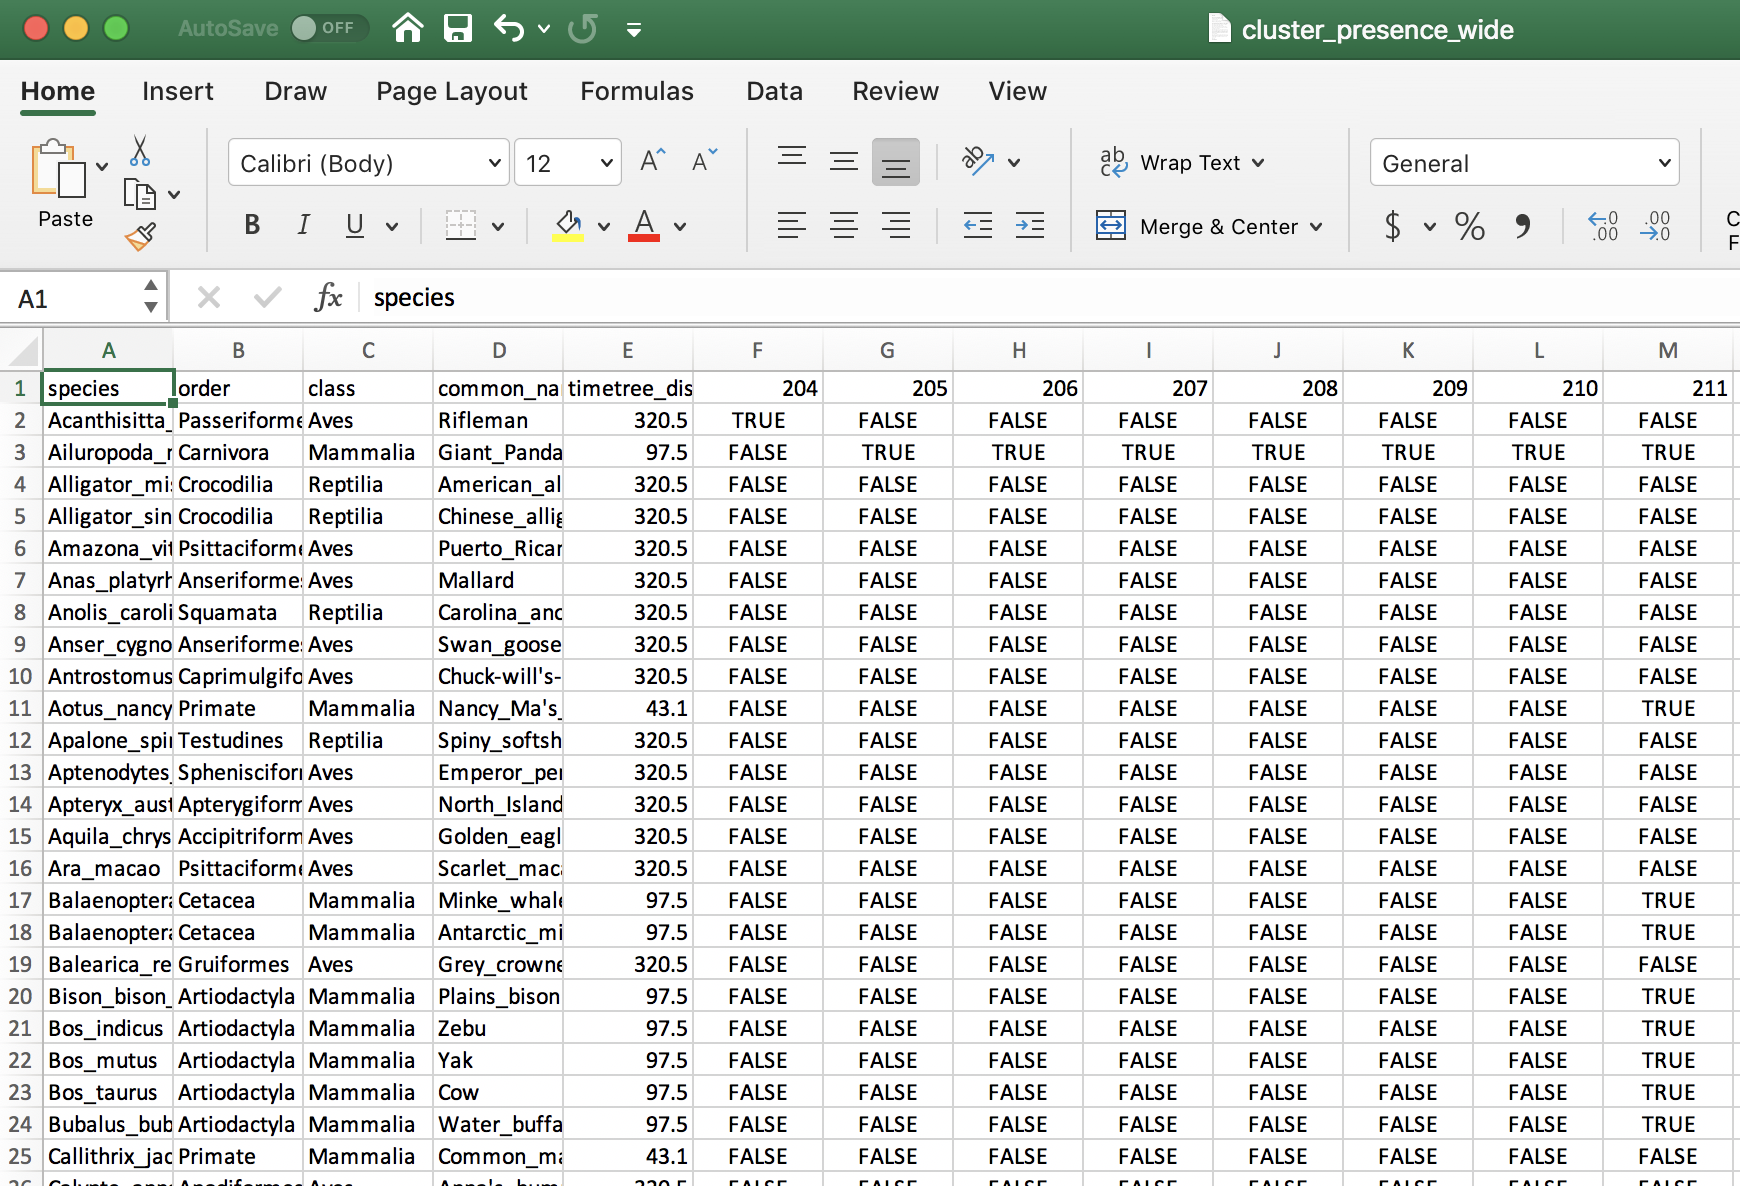

In [64]:
df2.rename(columns={'Estimated evolutionary distance from human (MY)': 'timeFromHuman_MY', 'Common name': 'CommonName'}, inplace=True)

df2

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species_code,Species,CommonName,Class,Order,timeFromHuman_MY,Cluster
0,LOC103802812,mRNA,rna8983,NW_008674413.1,3230,3739,-,KRAB-ZNFs,LNI-(XXX)-CSQ-RHR,4,3,CTECGKRFRLKINLIIHQRSH-(PVCDSVFSNKQHLDLHQSIH)-C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,204
1,NaN,.,.,GL192628.1,1267130,1268190,+,(KRAB)-ZNFs,(VAR)-(XXX)-(QNR)-(NVR)-(EYR)-(DTK)-(XXX)-(XXX),8,5,(CGECGQGFKVKSAVIRHHRTH)-(CGECGRGFSQMXNLINHRRH)...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,205
2,NaN,.,.,AGTM011622723.1,2406,3518,+,ZNFs,(CDQ)-(WSL)-(XXX)-(QHL)-(QQV)-(XXX)-(QQL)-(HSQ...,12,8,(CDKCGKYFSCSSDLAQHQSSH)-(CNVCGKXFSWDSSLILHHRTH...,Daubentonia_madagascariensis.v1.0,Daubentonia madagascariensis,Aye-aye,Mammalia,Primate,75.9,206
3,NaN,.,.,NW_007727638.1,337222,338335,-,(KRAB)-ZNFs,(CAR)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDRCGKYFSCGLALTRHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Galeopterus_variegatus.v3.0.2,Galeopterus variegatus,Sunda flying lemur,Mammalia,Dermoptera,81.3,206
4,NaN,.,.,GL192766.1,251367,252480,-,(KRAB)-ZNFs,(CDQ)-(RHQ)-(WSL)-(QCQ)-(QHL)-(QQL)-(HSQ)-(QQL...,13,13,(CDQCGKYFSCGLDLTQHQSTH)-(CRNCGKSFSRGTHLIQHERCH...,Ailuropoda_melanoleuca.ailMel1,Ailuropoda melanoleuca,Giant Panda,Mammalia,Carnivora,97.5,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48399,NaN,.,.,Scaffold45548,510715,511198,+,(KRAB)-ZNFs,(KEV)-(KDR)-(KDR)-(TDV)-(NHN)-(RSI),6,6,(CSDCGKCFKKRSELTVHQRTH)-(CSQCDKSFIKRWDLKRHHRTH...,Xenopus_laevi.v7.1,Xenopus laevi,African clawed frog,Reptilia,Anura,355.7,15299
48400,NaN,.,.,scaffold_8c,3092774,3093173,+,(KRAB)-ZNFs,(KEV)-(KDR)-(TDV)-(NHN)-(RNI),5,5,(CSDCGKCFKKPSELTVHQRTH)-(CSQCEKSFIKRWDLKRHYRTH...,Xenopus_tropicalis.v7.1,Xenopus tropicalis,Western clawed frog,Reptilia,Anura,355.7,15299
48401,NaN,.,.,scaffold_8c,3104745,3105559,+,(KRAB)-ZNFs,(XXX)-(CDN)-(YNY)-(SEV)-(SDV)-(KKD)-(HHG),7,6,(CNECHKNFSNKRDFNKHHRTC)-(CSECEEYFPCRSDLGNHQRIH...,Xenopus_tropicalis.v7.1,Xenopus tropicalis,Western clawed frog,Reptilia,Anura,355.7,15300
48402,NaN,.,.,scaffold_8c,3117072,3118314,+,(KRAB)-ZNFs,(CDD)-(HYY)-(TEV)-(SDV)-(SEA)-(KEA)-(SKV)-(SEV...,15,15,(CSECAESFSCRSDLDDHQRIH)-(CPECGRCFRHRRYLSYHLNIH...,Xenopus_tropicalis.v7.1,Xenopus tropicalis,Western clawed frog,Reptilia,Anura,355.7,15301


In [65]:
dfClusterIDBool

,Species,Cluster,Present
0,Acanthisitta chloris,204,True
1,Acanthisitta chloris,205,False
2,Acanthisitta chloris,206,False
3,Acanthisitta chloris,207,False
4,Acanthisitta chloris,208,False
...,...,...,...
2883904,Xenopus tropicalis,15298,True
2883905,Xenopus tropicalis,15299,True
2883906,Xenopus tropicalis,15300,True
2883907,Xenopus tropicalis,15301,True


In [66]:
dfClusterIDBool['Species']

0          Acanthisitta chloris
1          Acanthisitta chloris
2          Acanthisitta chloris
3          Acanthisitta chloris
4          Acanthisitta chloris
                   ...         
2883904      Xenopus tropicalis
2883905      Xenopus tropicalis
2883906      Xenopus tropicalis
2883907      Xenopus tropicalis
2883908      Xenopus tropicalis
Name: Species, Length: 2883909, dtype: object

In [67]:
df2['Species']

0                Acanthisitta chloris
1              Ailuropoda melanoleuca
2        Daubentonia madagascariensis
3              Galeopterus variegatus
4              Ailuropoda melanoleuca
                     ...             
48399                   Xenopus laevi
48400              Xenopus tropicalis
48401              Xenopus tropicalis
48402              Xenopus tropicalis
48403          Zonotrichia albicollis
Name: Species, Length: 48404, dtype: object

In [68]:
# Convert long to wide
df_wide = dfClusterIDBool.pivot(index='Species', columns='Cluster', values='Present').reset_index()
df_wide.columns.name = None

In [69]:
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [70]:
# df_wide.insert(1, 'Order', 'TODO')
# df_wide.insert(2, 'Class', 'TODO')
# df_wide.insert(3, 'CommonName', 'TODO')
# df_wide.insert(4, 'timeFromHuman_MY', 'TODO')


In [71]:
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [72]:
# df_wide['Order'] = 'a'
# df_wide

In [73]:
df2.loc[df2['Species']=='Acanthisitta chloris']['timeFromHuman_MY'][0]

np.float64(320.5)

In [74]:
df2.loc[df2['Species']=='Acanthisitta chloris']

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species_code,Species,CommonName,Class,Order,timeFromHuman_MY,Cluster
0,LOC103802812,mRNA,rna8983,NW_008674413.1,3230,3739,-,KRAB-ZNFs,LNI-(XXX)-CSQ-RHR,4,3,CTECGKRFRLKINLIIHQRSH-(PVCDSVFSNKQHLDLHQSIH)-C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,204
1192,LOC103808815,mRNA,rna14706,NW_008689924.1,4838,5069,-,ZNFs,CWR-RYN-(LSK),3,3,CSDCGKSFVCHSWLVRHQMTH-CSECDKSYRRKDYLLNHQRRH-(C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,706
15030,LOC103801799,mRNA,rna7967,NW_008671816.1,1036,1606,-,ZNFs,DLT-LSL-DKR-RHK-YSC,5,5,CCECGESFLDKQLFATHQKAH-CSQCKESFSLEVSLILHQKLH-CT...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,3638


In [75]:
# # # Since there are only 191 rows, I'll loop over the [species] array
# # for organism in species:
# #     # print(organism)
# #     df_wide.loc[df_wide['Species'] == organism, ['Order', 
# #                                                  'Class', 
# #                                                  'CommonName', 
# #                                                  'timeFromHuman_NY']] = [(df2.loc[df2['Species']==organism]['Order'][0]), 
# #                                                                          (df2.loc[df2['Species']==organism]['Class'][0]),
# #                                                                          (df2.loc[df2['Species']==organism]['CommonName'][0]),
# #                                                                          (df2.loc[df2['Species']==organism]['timeFromHuman_MY'])
# #                                                                         ]

# # Keep only the relevant columns from df2
# cols_to_add = ['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']

# # Merge data into df_wide
# df_wide = df_wide.merge(df2[cols_to_add], on='Species', how='left')


In [76]:
'void' in locals(), 'void' in globals()


(False, False)

In [77]:
df2[['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']]

,Species,Order,Class,CommonName,timeFromHuman_MY
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5
2,Daubentonia madagascariensis,Primate,Mammalia,Aye-aye,75.9
3,Galeopterus variegatus,Dermoptera,Mammalia,Sunda flying lemur,81.3
4,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5
...,...,...,...,...,...
48399,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7
48400,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7
48401,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7
48402,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7


In [78]:
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [79]:
print(df_wide.dtypes)
print(df2.dtypes)


Species    object
204          bool
205          bool
206          bool
207          bool
            ...  
15298        bool
15299        bool
15300        bool
15301        bool
15302        bool
Length: 15100, dtype: object
Label                    object
Type                     object
Gene ID                  object
chrom                    object
start                     int64
end                       int64
strand                   object
domain configuration     object
ZNF signature            object
# of ZNFs                 int64
# of ZNFs cannonical      int64
ZNFs                     object
Species_code             object
Species                  object
CommonName               object
Class                    object
Order                    object
timeFromHuman_MY        float64
Cluster                   int64
dtype: object


In [80]:
df_wide = df_wide.merge(
    df2[['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY', 'Label', ]],
    on='Species',
    how='left'
)
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15298,15299,15300,15301,15302,Order,Class,CommonName,timeFromHuman_MY,Label
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5,LOC103802812
1,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5,LOC103808815
2,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5,LOC103801799
3,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5,NaN
4,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48399,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102070500
48400,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102071146
48401,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102063870
48402,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102063870


In [81]:
df_wide = df_wide.drop_duplicates()
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15298,15299,15300,15301,15302,Order,Class,CommonName,timeFromHuman_MY,Label
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5,LOC103802812
1,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5,LOC103808815
2,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5,LOC103801799
3,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5,NaN
9,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5,ZNF555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48191,Xenopus tropicalis,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,Anura,Reptilia,Western clawed frog,355.7,NaN
48399,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102070500
48400,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102071146
48401,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5,LOC102063870


In [82]:
col0 = df_wide.pop('Order')        # remove the column
df_wide.insert(1, 'Order', col0)   # insert it at position 1 (0-based index)

col1 = df_wide.pop('Class')
df_wide.insert(2, 'Class', col1)

col2 = df_wide.pop('CommonName')
df_wide.insert(3, 'CommonName', col2)

col3 = df_wide.pop('timeFromHuman_MY')
df_wide.insert(4, 'timeFromHuman_MY', col3)

# Check df_wide
df_wide

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15294,15295,15296,15297,15298,15299,15300,15301,15302,Label
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,LOC103802812
1,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,LOC103808815
2,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,LOC103801799
3,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,NaN
9,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,ZNF555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48191,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,NaN
48399,Zonotrichia albicollis,Passeriformes,Aves,White-throated sparrow,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,LOC102070500
48400,Zonotrichia albicollis,Passeriformes,Aves,White-throated sparrow,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,LOC102071146
48401,Zonotrichia albicollis,Passeriformes,Aves,White-throated sparrow,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,LOC102063870


In [83]:
# # Save as parquet
# df_wide.to_parquet("dfWide_data.parquet", compression="snappy")

# # Save as CSV and ensure it saved by checking working directory
# df_wide.to_csv("dfWide_data.csv.gz", index=False, compression="gzip")

In [84]:
ls -lh

total 463M
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  26K Oct 17 21:04  41586_2017_BFnature21683_MOESM102_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 9.3M Oct 17 21:04  41586_2017_BFnature21683_MOESM103_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 359K Oct 17 21:04  41586_2017_BFnature21683_MOESM104_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 142K Oct 17 21:04  41586_2017_BFnature21683_MOESM105_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  33K Oct 17 21:04  41586_2017_BFnature21683_MOESM106_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 360K Oct 17 21:04  41586_2017_BFnature21683_MOESM107_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 416K Oct 17 21:04  41586_2017_BFnature21683_MOESM108_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 420K Oct 17 21:04  41586_2017_BFnature21683_MOESM109_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 325K Oct 17 21:04  41586_2017_BFnature21683_MOESM110_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 7.0M Oct 17 21:04  41586_2017_BF

In [85]:
df_wide_CSV_test = pd.read_csv("dfWide_data.csv")

In [86]:
df_wide_CSV_test

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,Crocodilia,Reptilia,American alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,Crocodilia,Reptilia,Chinese alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,Psittaciformes,Aves,Puerto Rican amazon,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,Artiodactyla,Mammalia,Huacaya alpaca,97.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,Squamata,Reptilia,Common European viper,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [87]:
df_wide_CSV_test.info()
print("\n")
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 15104 entries, Species to 15302
dtypes: bool(15099), float64(1), object(4)
memory usage: 2.8+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 20993 entries, 0 to 48403
Columns: 15105 entries, Species to Label
dtypes: bool(15099), float64(1), object(5)
memory usage: 303.4+ MB


### Target:
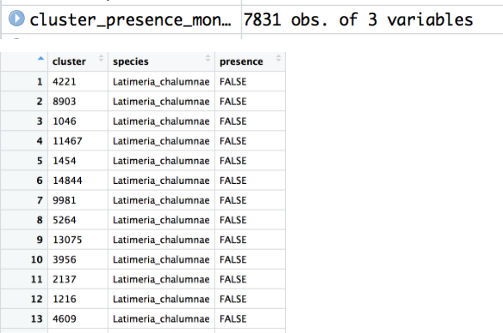

In [88]:
df_wide

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15294,15295,15296,15297,15298,15299,15300,15301,15302,Label
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,LOC103802812
1,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,LOC103808815
2,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,LOC103801799
3,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,NaN
9,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,ZNF555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48191,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,NaN
48399,Zonotrichia albicollis,Passeriformes,Aves,White-throated sparrow,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,LOC102070500
48400,Zonotrichia albicollis,Passeriformes,Aves,White-throated sparrow,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,LOC102071146
48401,Zonotrichia albicollis,Passeriformes,Aves,White-throated sparrow,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,LOC102063870


In [89]:
df_wide['Order'].unique()

array(['Passeriformes', 'Carnivora', 'Crocodilia', 'Psittaciformes',
       'Anseriformes', 'Squamata', 'Caprimulgiformes', 'Primate',
       'Testudines', 'Sphenisciformes', 'Apterygiformes',
       'Accipitriformes', 'Cetacea', 'Gruiformes', 'Artiodactyla',
       'Apodiformes', 'Cariamiformes', 'Cathartiformes', 'Rodentia',
       'Perissodactyla', 'Charadriiformes', 'Pilosa', 'Afrosoricida',
       'Galliformes', 'Coliiformes', 'Columbiformes', 'Soricomorpha',
       'Cuculiformes', 'Cingulata', 'Pelecaniformes', 'Chiroptera',
       'Macroscelidea', 'Erinaceomorpha', 'Eurypygiformes',
       'Falconiformes', 'Procellariiformes', 'Dermoptera', 'Gaviiformes',
       'Coelacanthiformes', 'Leptosomiformes', 'Proboscidea',
       'Diprotodontia', 'Pholidota', 'Mesitornithiformes',
       'Didelphimorphia', 'Anura', 'Ciconiiformes', 'Lagomorpha',
       'Opisthocomiformes', 'Monotremata', 'Tubulidentata', 'Suliformes',
       'Phoenicopteriformes', 'Piciformes', 'Podicipediformes',
    

## To replicate Anna's example, I'm going to isolate the clusters present in platypus, our single Monotremata species, and use that to make the long table. There are 41 clusters present.

In [90]:
df_monotremata = df_wide.loc[df_wide['Order'] == 'Monotremata']
df_monotremata

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15294,15295,15296,15297,15298,15299,15300,15301,15302,Label
33790,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,NaN
33791,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF436
33792,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF213
33793,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZSCAN20
33794,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZSCAN29
33797,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF212
33799,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF641
33800,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF777
33801,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF500
33805,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,ZNF746


In [91]:
num_true = (df_monotremata == True).sum().sum()
print("Number of True values:", num_true)


Number of True values: 656


In [92]:
df_monotremata == True

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15294,15295,15296,15297,15298,15299,15300,15301,15302,Label
33790,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33791,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33792,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33801,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
# List of metadata columns
id_vars = ['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']


In [ ]:
df_long = df_wide.melt(
    id_vars=id_vars,         # columns to keep as-is
    var_name='Cluster',      # name of the new column for the old column headers
    value_name='Present'     # name of the new column for the cell values
)


In [ ]:
df_long


In [ ]:
# Melt the wide dataframe to long format
df_mono_long = df_monotremata.melt(
    id_vars=['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY'],  # keep metadata
    var_name='Cluster',   # column for cluster IDs
    value_name='Present'  # column for True/False
)

# Convert cluster IDs to numeric (optional)
df_mono_long['Cluster'] = df_mono_long['Cluster']

# Keep only rows where Present is True
dfMonoClusterTrue = df_mono_long[df_mono_long['Present'] == True].reset_index(drop=True)

# # Optional: drop the Present column since all remaining rows are True
# dfMonoClusterTrue = dfMonoClusterTrue.drop(columns=['Present'])

dfMonoClusterTrue


In [ ]:
len(dfMonoClusterTrue) * 191 

In [ ]:
monoClusterCol = dfMonoClusterTrue['Cluster']

monotremeClusterArray = []

for cluster in monoClusterCol:
    monotremeClusterArray.append(cluster)

monotremeClusterArray

In [ ]:
df_wide.loc[df_wide['Species']=='Ornithorhynchus anatinus']['timeFromHuman_MY'].item()


In [ ]:
monoRows = []
# i = 0
for organism in species:
    for cluster in monotremeClusterArray:
        evoDist = df_wide.loc[df_wide['Species']==organism]['timeFromHuman_MY'].item()
        present = df_wide.loc[df_wide['Species']==organism][cluster].item()
        # i += 1
        
        monoRows.append({'cluster': cluster, 'species': organism, 'present': present, 'evoDist': evoDist})

# monoRows
# print(i)

In [ ]:
len(monoRows)

In [ ]:
# It is, so populate dataframe with False values for now
dfAllSpecies_MonotremataCluster41 = pd.DataFrame(monoRows)
dfAllSpecies_MonotremataCluster41

In [ ]:
dfMono41ClustAll191Species = dfAllSpecies_MonotremataCluster41.sort_values(by='evoDist', ascending=False)
dfMono41ClustAll191Species


In [ ]:
# # Save as parquet
# dfMono41ClustAll191Species.to_parquet("dfMono41ClustAll191Species.parquet", compression="snappy")

# # Save as CSV and ensure it saved by checking working directory
# dfMono41ClustAll191Species.to_csv("dfMono41ClustAll191Species.csv.gz", index=False, compression="gzip")

In [ ]:
ls -lh

In [ ]:
cluster_str = """
4221
8903
1046
11467
1454
14844
9981
5264
13075
3956
2137
1216
4609
8380
6036
706
11468
6061
1290
3627
10917
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10918
"""


In [ ]:
cluster_order = [int(x) for x in cluster_str.strip().split('\n')]
cluster_order

In [ ]:
len(cluster_order)

In [ ]:
dfMono41ClustAll191Species['cluster'] = pd.Categorical(dfMono41ClustAll191Species['cluster'], categories=cluster_order, ordered=True)

df_sorted = dfMono41ClustAll191Species.sort_values(by=['evoDist', 'species', 'cluster'], ascending=[False, True, True]).reset_index(drop=True)


In [ ]:
df_sorted

In [ ]:
num_nan = df_sorted['cluster'].isna().sum()
print(num_nan)

In [ ]:
# Save as parquet
# df_sorted.to_parquet("dfMono41ClustAll191Species_sorted.parquet", compression="snappy")

# Save as CSV and ensure it saved by checking working directory
# df_sorted.to_csv("dfMono41ClustAll191Species_Allsorted.csv.gz", index=False, compression="gzip")

In [ ]:
ls -lh

In [ ]:
df_sorted.loc[df_sorted['evoDist']==355.7].sort_values(by=['species'], ascending=True)

In [ ]:
# Find the order of most cluster TRUE in df to least
clusterTfreq = []


for cluster in monotremeClusterArray:
    freq = dfAllSpecies_MonotremataCluster41.loc[(dfAllSpecies_MonotremataCluster41['cluster'] == cluster) & (dfAllSpecies_MonotremataCluster41['present'] == True)].shape[0]
    clusterTfreq.append({'Cluster': cluster, 'Frequency_T': freq})


In [ ]:
clusterTfreq

In [ ]:
dfMonoClusterSortNew = pd.DataFrame(clusterTfreq)

In [ ]:
dfMonoClusterSortNew = dfMonoClusterSortNew.sort_values(by=['Frequency_T', 'Cluster'], ascending=[False, True])

In [ ]:
dfMonoClusterSortNew

In [ ]:
for i in range(len(cluster_order)):
    print(cluster_order[i], dfMonoClusterSortNew.iloc[i,0])
    if cluster_order[i] == dfMonoClusterSortNew.iloc[i,0]:
        print(f"Cluster in row {i} matches!")
    else:
        print("NO MATCH HERE")